<a href="https://colab.research.google.com/github/sato563/prog2kakushin/blob/main/work3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

画像ファイルの取得のため,最初に一度下記のプログラムを実行してください．

In [20]:
!wget "https://drive.google.com/uc?export=download&id=1hsUauww6HMD9YMejBh72as9x9wNCWeBc" -O images.zip
!unzip -o images.zip

--2024-01-16 06:52:03--  https://drive.google.com/uc?export=download&id=1hsUauww6HMD9YMejBh72as9x9wNCWeBc
Resolving drive.google.com (drive.google.com)... 209.85.146.138, 209.85.146.139, 209.85.146.113, ...
Connecting to drive.google.com (drive.google.com)|209.85.146.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1hsUauww6HMD9YMejBh72as9x9wNCWeBc&export=download [following]
--2024-01-16 06:52:03--  https://drive.usercontent.google.com/download?id=1hsUauww6HMD9YMejBh72as9x9wNCWeBc&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.159.132, 2607:f8b0:4001:c58::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.159.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 391994 (383K) [application/octet-stream]
Saving to: ‘images.zip’

images.zip          100%[===================>] 382.81K  --.-KB/s   

【画像当てゲーム】
この画像はなにをあらわしているでしょう？


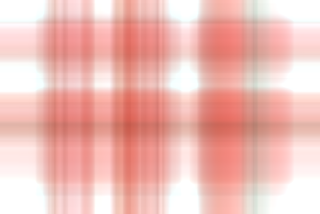

KeyboardInterrupt: Interrupted by user

In [44]:
import numpy as np
import cv2, sys
from google.colab.patches import cv2_imshow

def comp_im(A, r):
  rgb = A.shape[2]
  compressed_im = np.ones((rgb, A.shape[0], A.shape[1]))

  for n in range(rgb):
     C = A[:, :, n]
     U, s, V = np.linalg.svd(C, False)
     for i in range(r):
       compressed_im[n] += s[i] * U[:, i:i+1].dot(V[i:i+1, :])
  return compressed_im.transpose(1, 2, 0)

def main(r):
  im = cv2.imread('foods/tomato/tomato01.jpg')
  if im is None:
    sys.exit('エラー: ファイルを開けませんでした')
  compressed_im = comp_im(im, r)
  cv2_imshow(compressed_im)




print('【画像当てゲーム】')
print('この画像はなにをあらわしているでしょう？')

main(1)

i=0
while True:
  answer=input('A.')
  if answer=='トマト' or answer=='とまと':
    main(200)
    print('正解！！トマトでした～！')
    break
  elif i==0:
    print('ざんねん😢ヒントは食べ物！')
    i+=1
  elif i>0:
    main(7)
    print('おしい！これでわかるかな？')

